In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

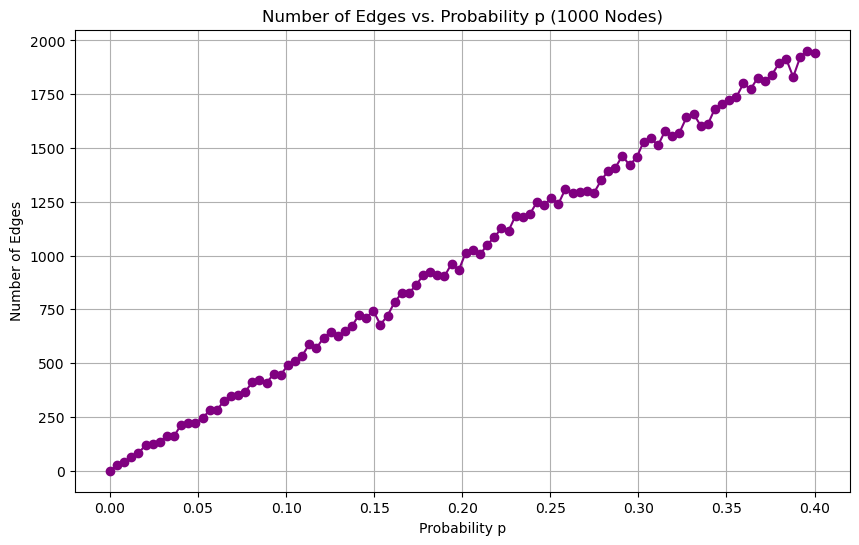

In [19]:
# 重新计算1000个节点的情况，这次关注的是边的数量
n = 100                                                   
num_edges_1000 = []
p_values= np.linspace(0, 0.4, 100)
for p in p_values:
    G = nx.erdos_renyi_graph(n, p)
    # 计算边的数量
    num_edges = G.number_of_edges()
    num_edges_1000.append(num_edges)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(p_values, num_edges_1000, 'o-', color='purple')
plt.title('Number of Edges vs. Probability p (1000 Nodes)')
plt.xlabel('Probability p')
plt.ylabel('Number of Edges')
plt.grid(True)
plt.show()


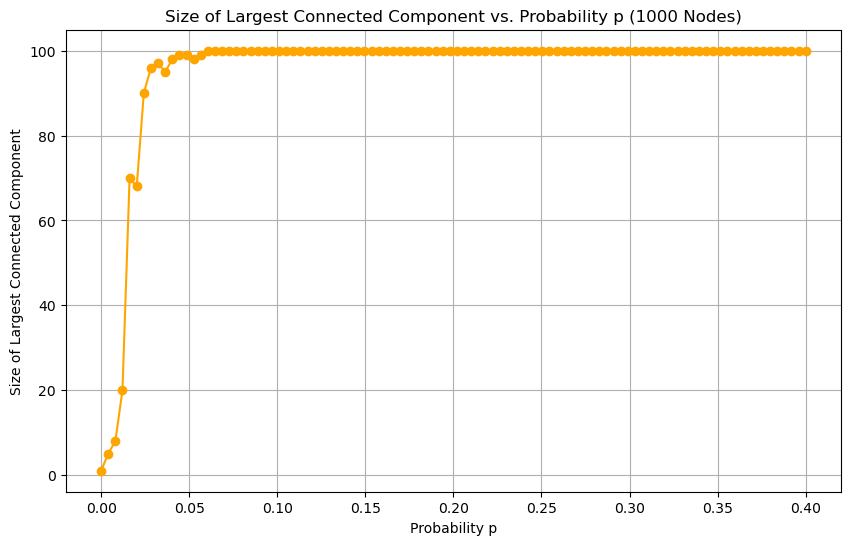

In [20]:
# 重新计算1000个节点的情况，这次关注的是最大连通分量的节点数
max_component_sizes_1000 = []

for p in p_values:
    G = nx.erdos_renyi_graph(n, p)
    # 计算最大连通分量的节点数
    max_component_size = max((len(c) for c in nx.connected_components(G)), default=0)
    max_component_sizes_1000.append(max_component_size)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(p_values, max_component_sizes_1000, 'o-', color='orange')
plt.title('Size of Largest Connected Component vs. Probability p (1000 Nodes)')
plt.xlabel('Probability p')
plt.ylabel('Size of Largest Connected Component')
plt.grid(True)
plt.show()


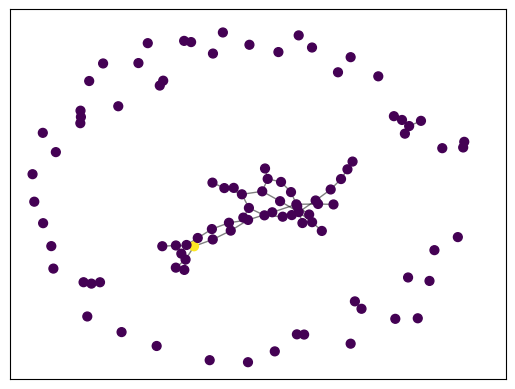

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
import networkx as nx
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# 创建一个简单的网络
G = nx.erdos_renyi_graph(100, 0.013)

# 获取邻接矩阵
adj_matrix = nx.to_numpy_array(G)

# 应用高斯混合模型
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(adj_matrix)
labels = gmm.predict(adj_matrix)

# 绘制结果
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=labels)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
labels


In [ ]:
G = nx.erdos_renyi_graph(10, 0.3, seed=1)

In [ ]:
G = nx.Graph()

In [ ]:
pos = nx.spring_layout(G, iterations=20) #我们设算法迭代次数为20次
nx.draw_networkx_edges(G, pos, edge_color="orange")
nx.draw_networkx_nodes(G, pos, node_color="black")
nx.draw_networkx_labels(G, pos, font_color="white")
plt.show()

In [ ]:
nx.draw_networkx_edges(G,pos, width=[float(d['weight']*10) for (u,v,d) in G.edges(data=True)], edge_color="orange")
nx.draw_networkx_nodes(G,pos, node_color="black")
nx.draw_networkx_labels(G, pos, font_color="white")
plt.show()

In [ ]:
# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()
